# Exercise 1 - Data Collection and Analysis
## ICT for Smart Mobility

This exercise analyzes three different transport datasets to understand data collection methods and characteristics.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import zipfile
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Task A: Identify Data Sources

We need to associate the 3 datasets with:
1. **Survey**: Data about commuting habits from population sampling
2. **Point traffic sensor**: Traffic count measurements from inductive loops (5-minute windows)
3. **GTFS data**: Public transportation schedules and geographic information

### Analyze Dataset1.zip (GTFS Data)

In [3]:
# Extract and examine Dataset1.zip
with zipfile.ZipFile('Dataset1.zip', 'r') as zip_ref:
    print("Files in Dataset1.zip:")
    print(zip_ref.namelist())
    
    # These are standard GTFS files
    # Extract all files
    zip_ref.extractall('Dataset1_extracted')

Files in Dataset1.zip:
['shapes.txt', 'stop_times.txt', 'stops.txt', 'trips.txt', 'agency.txt', 'calendar_dates.txt', 'routes.txt', 'calendar.txt']


In [4]:
# Load GTFS files
stops = pd.read_csv('Dataset1_extracted/stops.txt')
routes = pd.read_csv('Dataset1_extracted/routes.txt')
trips = pd.read_csv('Dataset1_extracted/trips.txt')
stop_times = pd.read_csv('Dataset1_extracted/stop_times.txt')
calendar = pd.read_csv('Dataset1_extracted/calendar.txt')

print("\n=== STOPS Sample ===")
print(stops.head())
print("\n=== ROUTES Sample ===")
print(routes.head())
print("\n=== CALENDAR Sample ===")
print(calendar.head())


=== STOPS Sample ===
    stop_id stop_code  stop_name stop_desc   stop_lat  stop_lon zone_id  \
0   AIRASCA              Airasca            44.928037  7.483288           
1      ALBA                 Alba            44.697703  8.030688           
2  ALPIGNAN            Alpignano            45.091032  7.524101           
3      ASTI                 Asti            44.894852  8.207680           
4  AVIGLIAN            Avigliana            45.085438  7.400847           

  stop_url location_type parent_station  
0                                        
1                                        
2                                        
3                                        
4                                        

=== ROUTES Sample ===
            route_id agency_id route_short_name  \
0               SFM1     GTT_F             SFM1   
1          SFM1 Pont     GTT_F             SFM1   
2               SFM2        FS             SFM2   
3           SFM2 Bus        FS           FM2Bus 

**Conclusion**: Dataset1.zip is **GTFS data** (General Transit Feed Specification)
- Contains standard GTFS files: stops, routes, trips, stop_times, calendar
- Describes public transportation schedules and geographic locations

### Analyze Dataset2.xml (Traffic Sensor Data)

In [5]:
# Parse XML file
tree = ET.parse('Dataset2.xml')
root = tree.getroot()

print(f"Root tag: {root.tag}")
print(f"Root attributes: {root.attrib}")
print(f"\nNumber of FDT_data elements: {len(root.findall('.//{https://simone.5t.torino.it/ns/traffic_data.xsd}FDT_data'))}")

# Extract first few records
namespace = {'ns': 'https://simone.5t.torino.it/ns/traffic_data.xsd'}
fdt_data = root.findall('.//ns:FDT_data', namespace)

print("\n=== First 3 Traffic Sensor Records ===")
for i, data in enumerate(fdt_data[:3]):
    print(f"\nRecord {i+1}:")
    print(f"  Road: {data.attrib.get('Road_name')}")
    print(f"  Location: ({data.attrib.get('lat')}, {data.attrib.get('lng')})")
    print(f"  Period: {data.attrib.get('period')} minutes")
    speedflow = data.find('ns:speedflow', namespace)
    if speedflow is not None:
        print(f"  Flow: {speedflow.attrib.get('flow')} vehicles")
        print(f"  Speed: {speedflow.attrib.get('speed')} km/h")

Root tag: {https://simone.5t.torino.it/ns/traffic_data.xsd}traffic_data
Root attributes: {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'https://simone.5t.torino.it/ns/traffic_data.xsd traffic_data.xsd', 'datatype': 'misura', 'source': '5T', 'generation_time': '2022-10-04T14:09:49.557Z', 'start_time': '2022-10-04T14:00:00.000Z', 'end_time': '2022-10-04T14:05:00.000Z'}

Number of FDT_data elements: 59

=== First 3 Traffic Sensor Records ===

Record 1:
  Road: SS23 Del Colle Di Sestriere
  Location: (44.955301, 7.199642)
  Period: 5 minutes
  Flow: 288 vehicles
  Speed: 50 km/h

Record 2:
  Road: SS23 Del Colle Di Sestriere
  Location: (44.955228, 7.199655)
  Period: 5 minutes
  Flow: 288 vehicles
  Speed: 47 km/h

Record 3:
  Road: SS24 Del Monginevro
  Location: (45.13287, 7.06817)
  Period: 5 minutes
  Flow: 396 vehicles
  Speed: 66 km/h


**Conclusion**: Dataset2.xml is **Point traffic sensor data**
- Contains measurements from inductive loops
- Includes flow (vehicles count) and speed measurements
- Data collected in 5-minute windows (period="5")
- Geographic coordinates for each sensor location

### Analyze Dataset3.csv (Survey Data)

In [6]:
# Load survey data
survey = pd.read_csv('Dataset3.csv')

print("=== Survey Dataset Info ===")
print(survey.info())
print("\n=== First 10 rows ===")
print(survey.head(10))
print("\n=== Unique values ===")
print(f"Means of transportation: {survey['Means of transportation'].unique()}")
print(f"Gender: {survey['Gender'].unique()}")
print(f"Age classes: {survey['Age class'].unique()}")

=== Survey Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Means of transportation  528 non-null    object 
 1   Gender                   528 non-null    object 
 2   Age class                528 non-null    object 
 3   year                     528 non-null    int64  
 4   Value (thousands)        524 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 20.8+ KB
None

=== First 10 rows ===
  Means of transportation   Gender          Age class  year  Value (thousands)
0                 by foot  females  65 years and over  2020               38.0
1                 by foot  females  65 years and over  2021               45.0
2                 by foot    males        45-54 years  2020              345.0
3                 by foot    males        45-54 years  2021              358.0
4   

**Conclusion**: Dataset3.csv is **Survey data**
- Contains commuting information by transportation mode
- Segmented by gender, age class, and year
- Values in thousands of people
- Typical survey structure for population sampling

### Summary of Task A

| Dataset | Type | Description |
|---------|------|-------------|
| Dataset1.zip | **GTFS** | Public transportation schedules and locations |
| Dataset2.xml | **Point Traffic Sensor** | Inductive loop measurements (5-min windows) |
| Dataset3.csv | **Survey** | Commuting habits by population sampling |

## Task B: Analyze Survey Dataset

### Question 1: How many people in total use the metro to go to work in 2021?

In [7]:
# Filter for metro users in 2021
metro_2021 = survey[(survey['Means of transportation'] == 'metro') & 
                    (survey['year'] == 2021)]

total_metro = metro_2021['Value (thousands)'].sum()
print(f"Total people using metro in 2021: {total_metro:,.0f} thousands")
print(f"That is: {total_metro * 1000:,.0f} people")

print("\nBreakdown by gender and age:")
print(metro_2021[['Gender', 'Age class', 'Value (thousands)']])

Total people using metro in 2021: 2,296 thousands
That is: 2,296,000 people

Breakdown by gender and age:
      Gender          Age class  Value (thousands)
57     males  15 years and over              276.0
81     males        25-34 years               55.0
87     males        15-19 years                3.0
107    males        20-24 years                2.0
137    total  65 years and over               22.0
167    total        45-54 years              170.0
191    total        20-24 years                6.0
193  females  65 years and over               14.0
259    total        25-34 years              133.0
287    total  15 years and over              574.0
297    males        45-54 years               83.0
325    males        55-64 years               61.0
337  females  15 years and over              298.0
365  females        55-64 years               51.0
383    total        35-44 years              128.0
399    males        35-44 years               64.0
405  females        20-24 y

### Question 2: Are there more females or males that commute to work in the survey?

=== Total commuters by gender ===
Gender
males      99155.0
females    67467.0
Name: Value (thousands), dtype: float64

Difference: 31688 thousands

Answer: There are MORE MALES commuting to work


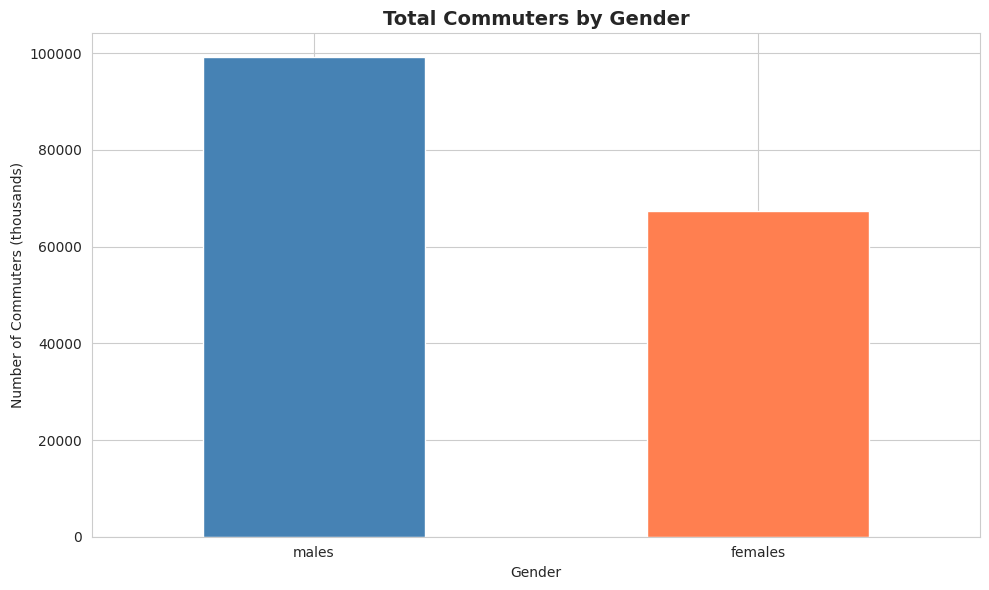

In [8]:
# Filter out 'total' category to avoid double counting
gendered_data = survey[survey['Gender'].isin(['males', 'females'])]

# Sum by gender
gender_totals = gendered_data.groupby('Gender')['Value (thousands)'].sum().sort_values(ascending=False)

print("=== Total commuters by gender ===")
print(gender_totals)
print(f"\nDifference: {abs(gender_totals['males'] - gender_totals['females']):.0f} thousands")

if gender_totals['males'] > gender_totals['females']:
    print("\nAnswer: There are MORE MALES commuting to work")
else:
    print("\nAnswer: There are MORE FEMALES commuting to work")

# Visualize
plt.figure(figsize=(10, 6))
gender_totals.plot(kind='bar', color=['steelblue', 'coral'])
plt.title('Total Commuters by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Commuters (thousands)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Question 3: Which category (gender+age class) uses more motorcycle/moped?

=== Top 10 Categories Using Motorcycle/Moped ===
Gender   Age class        
males    15 years and over    1314.0
         45-54 years           438.0
         35-44 years           316.0
females  15 years and over     288.0
males    55-64 years           285.0
         25-34 years           203.0
females  45-54 years           108.0
         35-44 years            69.0
         55-64 years            52.0
         25-34 years            51.0
Name: Value (thousands), dtype: float64

Answer: The category with most motorcycle/moped usage is:
  Gender: males
  Age class: 15 years and over
  Total: 1,314 thousands people


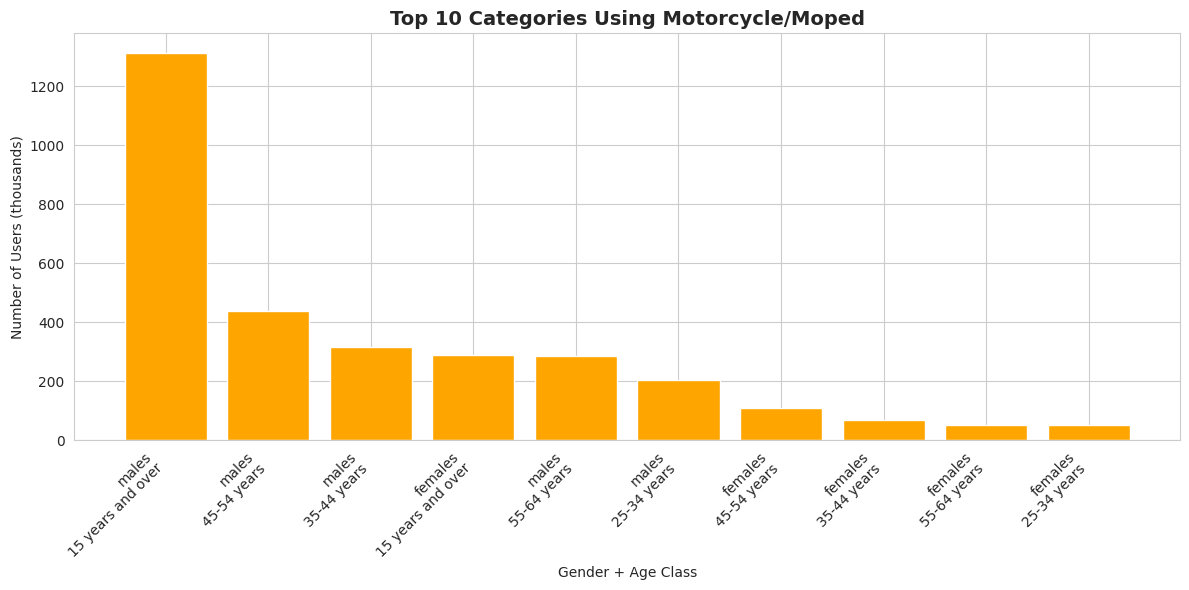

In [9]:
# Filter for motorcycle/moped
motorcycle_data = survey[survey['Means of transportation'] == 'motorcycle, moped']

# Remove 'total' to focus on specific categories
motorcycle_specific = motorcycle_data[motorcycle_data['Gender'] != 'total']

# Group by gender and age class
motorcycle_by_category = motorcycle_specific.groupby(['Gender', 'Age class'])['Value (thousands)'].sum()
motorcycle_sorted = motorcycle_by_category.sort_values(ascending=False)

print("=== Top 10 Categories Using Motorcycle/Moped ===")
print(motorcycle_sorted.head(10))

top_category = motorcycle_sorted.index[0]
top_value = motorcycle_sorted.iloc[0]
print(f"\nAnswer: The category with most motorcycle/moped usage is:")
print(f"  Gender: {top_category[0]}")
print(f"  Age class: {top_category[1]}")
print(f"  Total: {top_value:,.0f} thousands people")

# Visualize top 10
plt.figure(figsize=(12, 6))
top_10 = motorcycle_sorted.head(10)
labels = [f"{gender}\n{age}" for gender, age in top_10.index]
plt.bar(range(len(top_10)), top_10.values, color='orange')
plt.xticks(range(len(top_10)), labels, rotation=45, ha='right')
plt.title('Top 10 Categories Using Motorcycle/Moped', fontsize=14, fontweight='bold')
plt.ylabel('Number of Users (thousands)')
plt.xlabel('Gender + Age Class')
plt.tight_layout()
plt.show()

## Task C: Analyze Point Traffic Sensor Data

In [10]:
# Parse XML and create DataFrame
traffic_data = []

for data in fdt_data:
    record = {
        'lcd1': data.attrib.get('lcd1'),
        'Road_LCD': data.attrib.get('Road_LCD'),
        'Road_name': data.attrib.get('Road_name'),
        'direction': data.attrib.get('direction'),
        'lat': float(data.attrib.get('lat', 0)),
        'lng': float(data.attrib.get('lng', 0)),
        'period': int(data.attrib.get('period', 0))
    }
    
    speedflow = data.find('ns:speedflow', namespace)
    if speedflow is not None:
        record['flow'] = int(speedflow.attrib.get('flow', 0))
        record['speed'] = float(speedflow.attrib.get('speed', 0))
    else:
        record['flow'] = 0
        record['speed'] = 0
    
    traffic_data.append(record)

traffic_df = pd.DataFrame(traffic_data)

print("=== Traffic Sensor Dataset ===")
print(f"Total records: {len(traffic_df)}")
print("\nFirst 5 records:")
print(traffic_df.head())
print("\nStatistics:")
print(traffic_df[['flow', 'speed']].describe())

=== Traffic Sensor Dataset ===
Total records: 59

First 5 records:
   lcd1 Road_LCD                    Road_name direction        lat       lng  \
0  4855      335  SS23 Del Colle Di Sestriere  positive  44.955301  7.199642   
1  4856      335  SS23 Del Colle Di Sestriere  negative  44.955228  7.199655   
2  4878      336          SS24 Del Monginevro  negative  45.132870  7.068170   
3  4877      336          SS24 Del Monginevro  positive  45.132870  7.068170   
4  4849      335  SS23 Del Colle Di Sestriere  positive  44.885630  7.373100   

   period  flow  speed  
0       5   288   50.0  
1       5   288   47.0  
2       5   396   66.0  
3       5   324   75.0  
4       5   168   61.0  

Statistics:
              flow       speed
count    59.000000   59.000000
mean    495.796610   40.147288
std     531.847748   28.065394
min       0.000000    0.000000
25%      48.000000    0.000000
50%     324.000000   49.170000
75%     708.000000   58.000000
max    2148.000000  112.000000


### Question 1: Which is the road with the highest flow (vehicles/h)?

In [11]:
# Convert flow to vehicles/hour (currently in 5-minute period)
# flow per 5 minutes * 12 = flow per hour
traffic_df['flow_per_hour'] = traffic_df['flow'] * (60 / traffic_df['period'])

# Find road with highest flow
max_flow_idx = traffic_df['flow_per_hour'].idxmax()
max_flow_road = traffic_df.loc[max_flow_idx]

print("=== Road with Highest Flow ===")
print(f"Road name: {max_flow_road['Road_name']}")
print(f"Flow: {max_flow_road['flow_per_hour']:.0f} vehicles/hour")
print(f"Direction: {max_flow_road['direction']}")
print(f"Location: ({max_flow_road['lat']}, {max_flow_road['lng']})")
print(f"Speed: {max_flow_road['speed']} km/h")

# Top 10 roads by flow
top_flow = traffic_df.nlargest(10, 'flow_per_hour')[['Road_name', 'flow_per_hour', 'direction', 'speed']]
print("\n=== Top 10 Roads by Flow ===")
print(top_flow)

=== Road with Highest Flow ===
Road name: Corso Unita' D'italia(TO)
Flow: 25776 vehicles/hour
Direction: positive
Location: (45.01876, 7.66932)
Speed: 53.54 km/h

=== Top 10 Roads by Flow ===
                      Road_name  flow_per_hour direction  speed
48    Corso Unita' D'italia(TO)        25776.0  positive  53.54
47            Corso Trieste(TO)        23184.0  positive  50.93
57    Corso Unita' D'italia(TO)        20880.0  negative  56.00
58    Corso Unita' D'italia(TO)        19872.0  positive  58.00
45          Corso Orbassano(TO)        19008.0  positive  30.43
55          Corso Orbassano(TO)        16128.0  positive  54.35
50      Corso Giulio Cesare(TO)        12816.0  positive  58.89
46          Corso Orbassano(TO)        12240.0  positive  45.45
41  Corso Regina Margherita(TO)        11376.0  positive  48.17
39      Corso Giulio Cesare(TO)        10656.0  positive  49.60


### Question 2: Which is the lowest average flow speed (km/h)?

In [12]:
# Filter out zero speeds (sensors with no data)
active_sensors = traffic_df[traffic_df['speed'] > 0]

# Find lowest speed
min_speed_idx = active_sensors['speed'].idxmin()
min_speed_road = active_sensors.loc[min_speed_idx]

print("=== Location with Lowest Average Speed ===")
print(f"Road name: {min_speed_road['Road_name']}")
print(f"Speed: {min_speed_road['speed']} km/h")
print(f"Flow: {min_speed_road['flow_per_hour']:.0f} vehicles/hour")
print(f"Direction: {min_speed_road['direction']}")
print(f"Location: ({min_speed_road['lat']}, {min_speed_road['lng']})")

# Bottom 10 speeds
bottom_speed = active_sensors.nsmallest(10, 'speed')[['Road_name', 'speed', 'flow_per_hour', 'direction']]
print("\n=== Bottom 10 Locations by Speed ===")
print(bottom_speed)

=== Location with Lowest Average Speed ===
Road name: Corso Unione Sovietica(TO)
Speed: 23.02 km/h
Flow: 7488 vehicles/hour
Direction: positive
Location: (45.022222, 7.634876)

=== Bottom 10 Locations by Speed ===
                      Road_name  speed  flow_per_hour direction
54   Corso Unione Sovietica(TO)  23.02         7488.0  positive
40           Corso Vercelli(TO)  27.31         9216.0  positive
45          Corso Orbassano(TO)  30.43        19008.0  positive
44        Corso Sebastopoli(TO)  34.11         8496.0  positive
51        Ponte Amedeo VIII(TO)  36.00        10368.0  positive
26  SS23 Del Colle Di Sestriere  40.00         1152.0  positive
52            Corso Francia(TO)  42.64         8208.0  positive
42  Corso Regina Margherita(TO)  43.91         8352.0  positive
46          Corso Orbassano(TO)  45.45        12240.0  positive
35           Corso Allamano(TO)  46.72         6048.0  positive


### Question 3: Locate through the coordinates the position of the inductive loop further to the east

=== Easternmost Inductive Loop ===
Road name: Strada Di Settimo(TO)
Coordinates: Latitude=45.103604, Longitude=7.725984
Direction: positive
Flow: 7920 vehicles/hour
Speed: 51.85 km/h


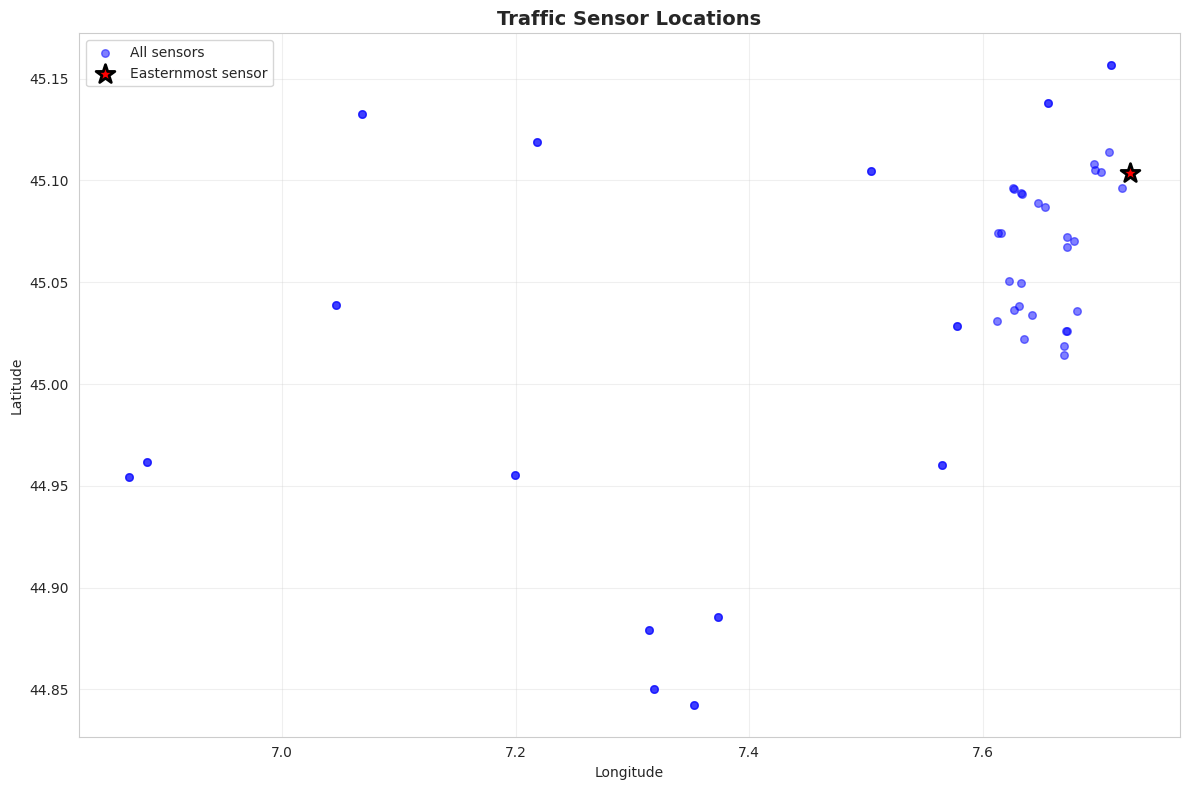


Google Maps link: https://www.google.com/maps?q=45.103604,7.725984


In [13]:
# Find easternmost sensor (highest longitude)
east_idx = traffic_df['lng'].idxmax()
easternmost = traffic_df.loc[east_idx]

print("=== Easternmost Inductive Loop ===")
print(f"Road name: {easternmost['Road_name']}")
print(f"Coordinates: Latitude={easternmost['lat']}, Longitude={easternmost['lng']}")
print(f"Direction: {easternmost['direction']}")
print(f"Flow: {easternmost['flow_per_hour']:.0f} vehicles/hour")
print(f"Speed: {easternmost['speed']} km/h")

# Create a simple map visualization
plt.figure(figsize=(12, 8))
plt.scatter(traffic_df['lng'], traffic_df['lat'], c='blue', alpha=0.5, s=30, label='All sensors')
plt.scatter(easternmost['lng'], easternmost['lat'], c='red', s=200, marker='*', 
            label='Easternmost sensor', edgecolors='black', linewidths=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Sensor Locations', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nGoogle Maps link: https://www.google.com/maps?q={easternmost['lat']},{easternmost['lng']}")

## Task D: Analyze GTFS Dataset

### Question 1: How many stops are there in the dataset?

=== GTFS Stops Analysis ===
Total number of stops: 132

Stops dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         132 non-null    object 
 1   stop_code       132 non-null    object 
 2   stop_name       130 non-null    object 
 3   stop_desc       132 non-null    object 
 4   stop_lat        132 non-null    float64
 5   stop_lon        132 non-null    float64
 6   zone_id         132 non-null    object 
 7   stop_url        132 non-null    object 
 8   location_type   132 non-null    object 
 9   parent_station  132 non-null    object 
dtypes: float64(2), object(8)
memory usage: 10.4+ KB
None

First 10 stops:
    stop_id stop_code             stop_name stop_desc   stop_lat  stop_lon  \
0   AIRASCA                         Airasca            44.928037  7.483288   
1      ALBA                            Alba     

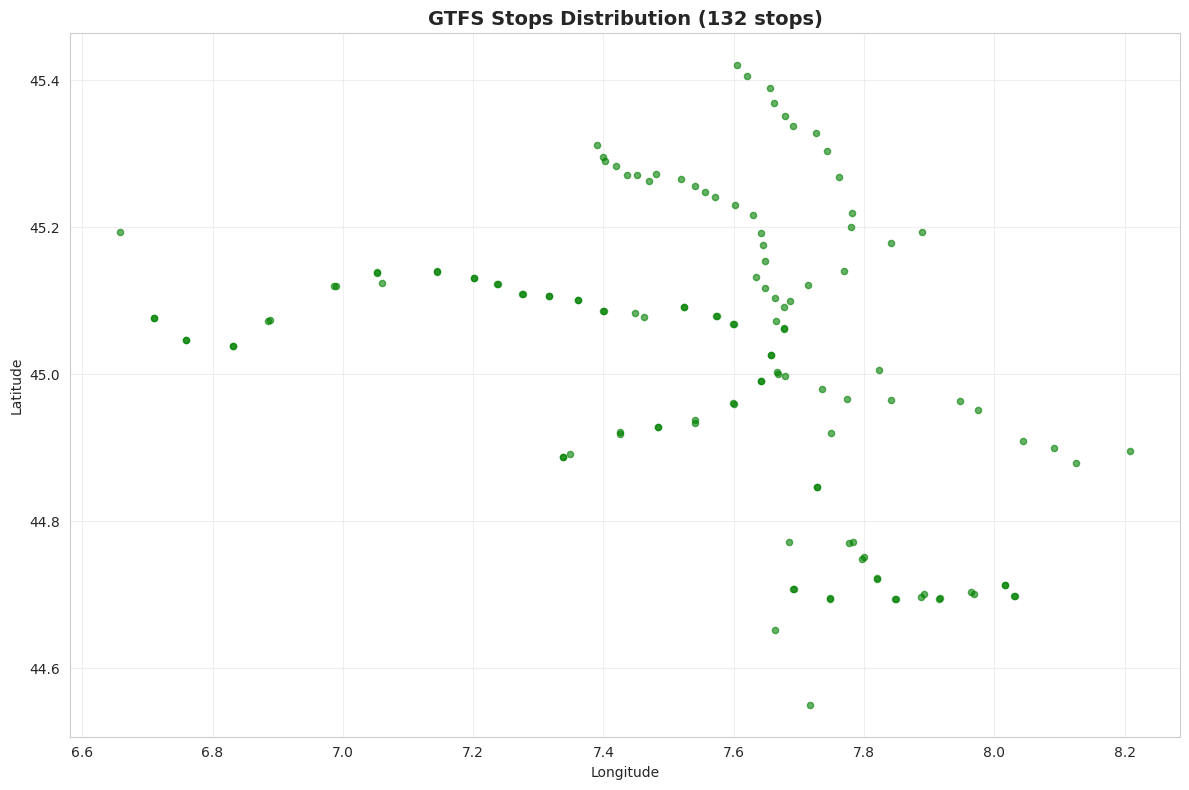

In [14]:
# Count total stops
total_stops = len(stops)

print("=== GTFS Stops Analysis ===")
print(f"Total number of stops: {total_stops}")
print("\nStops dataset info:")
print(stops.info())
print("\nFirst 10 stops:")
print(stops.head(10))

# Visualize stops on map
if 'stop_lat' in stops.columns and 'stop_lon' in stops.columns:
    plt.figure(figsize=(12, 8))
    plt.scatter(stops['stop_lon'], stops['stop_lat'], c='green', alpha=0.6, s=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'GTFS Stops Distribution ({total_stops} stops)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### Question 2: Identify the names of the routes that have service on Sundays

In [15]:
# Check calendar for Sunday service (sunday column = 1)
print("=== Calendar Data ===")
print(calendar.head())
print(f"\nCalendar columns: {calendar.columns.tolist()}")

# Filter for services operating on Sunday
if 'sunday' in calendar.columns:
    sunday_services = calendar[calendar['sunday'] == 1]['service_id'].unique()
    print(f"\nNumber of service IDs with Sunday service: {len(sunday_services)}")
    
    # Find trips with these service IDs
    sunday_trips = trips[trips['service_id'].isin(sunday_services)]
    
    # Get route IDs for these trips
    sunday_route_ids = sunday_trips['route_id'].unique()
    
    # Get route names from routes table
    sunday_routes = routes[routes['route_id'].isin(sunday_route_ids)]
    
    print("\n=== Routes with Sunday Service ===")
    print(f"Total routes with Sunday service: {len(sunday_routes)}")
    print("\nRoute names:")
    if 'route_long_name' in sunday_routes.columns:
        for idx, row in sunday_routes.iterrows():
            print(f"  - {row['route_long_name']} (ID: {row['route_id']})")
    elif 'route_short_name' in sunday_routes.columns:
        for idx, row in sunday_routes.iterrows():
            print(f"  - {row['route_short_name']} (ID: {row['route_id']})")
    else:
        print(sunday_routes[['route_id']])
else:
    print("Sunday column not found in calendar data")

=== Calendar Data ===
  service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
0       FER5       1        1          1         1       1         0       0   
1     FER5-A       1        1          1         1       1         0       0   
2    FER5-NA       1        1          1         1       1         0       0   
3       FER6       1        1          1         1       1         1       0   
4      FER6A       1        1          1         1       1         1       0   

   start_date  end_date  
0    20141214  20160612  
1    20141214  20160612  
2    20141214  20160612  
3    20141214  20160612  
4    20150803  20150830  

Calendar columns: ['service_id', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'start_date', 'end_date']

Number of service IDs with Sunday service: 5

=== Routes with Sunday Service ===
Total routes with Sunday service: 12

Route names:
  - Chieri-Rivarolo (ID: SFM1)
  - Pinerolo-Chivasso (ID: SFM2)
  - Bu

### Question 3: Where is located the stop/s with the latest arrival time?

In [16]:
# Find latest arrival time
print("=== Stop Times Analysis ===")
print(stop_times.head())

# Convert arrival_time to comparable format
# Note: GTFS times can exceed 24:00:00 for times after midnight

def time_to_seconds(time_str):
    """Convert time string to seconds since midnight"""
    try:
        parts = time_str.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2])
        return hours * 3600 + minutes * 60 + seconds
    except:
        return 0

stop_times['arrival_seconds'] = stop_times['arrival_time'].apply(time_to_seconds)

# Find latest arrival
latest_idx = stop_times['arrival_seconds'].idxmax()
latest_stop = stop_times.loc[latest_idx]

print("\n=== Stop with Latest Arrival Time ===")
print(f"Arrival time: {latest_stop['arrival_time']}")
print(f"Stop ID: {latest_stop['stop_id']}")
print(f"Trip ID: {latest_stop['trip_id']}")

# Find stop details
stop_details = stops[stops['stop_id'] == latest_stop['stop_id']]
if len(stop_details) > 0:
    stop_info = stop_details.iloc[0]
    print(f"\nStop name: {stop_info.get('stop_name', 'N/A')}")
    print(f"Location: Latitude={stop_info.get('stop_lat', 'N/A')}, Longitude={stop_info.get('stop_lon', 'N/A')}")
    
    if 'stop_lat' in stop_info and 'stop_lon' in stop_info:
        print(f"\nGoogle Maps link: https://www.google.com/maps?q={stop_info['stop_lat']},{stop_info['stop_lon']}")

# Top 10 latest arrivals
top_late = stop_times.nlargest(10, 'arrival_seconds')[['stop_id', 'arrival_time', 'trip_id']]
print("\n=== Top 10 Latest Arrival Times ===")
print(top_late)

=== Stop Times Analysis ===
       trip_id arrival_time departure_time   stop_id  stop_sequence
0  SFM_4100/01      6:49:00        6:49:00    CHIERI              1
1  SFM_4100/01      6:58:00        7:01:00  TROFAREL              2
2  SFM_4100/01      7:05:00        7:06:00     MONCA              3
3  SFM_4100/01      7:10:00        7:11:00  LINGOTTO              4
4  SFM_4100/01      7:19:00        7:20:00    P SUSA              5

=== Stop with Latest Arrival Time ===
Arrival time: 25:34:00
Stop ID: BARDONEC_B
Trip ID: sfm_RP078

Stop name: Bardonecchia
Location: Latitude=45.0763168772867, Longitude=6.709625246151

Google Maps link: https://www.google.com/maps?q=45.0763168772867,6.709625246151

=== Top 10 Latest Arrival Times ===
         stop_id arrival_time    trip_id
2302  BARDONEC_B     25:34:00  sfm_RP078
2301  BEAULARD_B     25:28:00  sfm_RP078
2300      OULX_B     25:21:00  sfm_RP078
2299  SALBERTR_B     25:17:00  sfm_RP078
2298  CHIOMONT_B     25:12:00  sfm_RP078
2297      SU

## Summary

This exercise demonstrated the analysis of three different types of transport data:

1. **GTFS Data (Dataset1.zip)**: Public transportation schedules and geographic information
2. **Traffic Sensor Data (Dataset2.xml)**: Real-time traffic flow and speed measurements
3. **Survey Data (Dataset3.csv)**: Commuting behavior patterns from population sampling

Each data source provides unique insights for smart mobility applications and urban transportation planning.